In [1]:
import numpy as np
import pandas as pd 
import random
import datetime as dt
import os
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler

register_matplotlib_converters() # Funcion que convierte implicitamente la series de tiempo

print("Holi")

Holi


In [2]:
Cripto_Series=pd.read_csv("C:\\Users\\Recup\\OneDrive\\Documentos\\Machine_Learning\\semilleroml_macc\\Time_series\\crypto-markets.csv")
# Imprime los primeros datos de la la base de datos
print("----------------PRIMEROS DATOS BASE CRIPTOMONEDAS ----------------------")
print(Cripto_Series.head())
# Imprime algunas estadisticas descriptivas
## print(Cripto_Series.describe())
# Informacion para saber el tipo de variable numerico/String
#print(Cripto_Series.info())

----------------PRIMEROS DATOS BASE CRIPTOMONEDAS ----------------------
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.488567e+09       0.5438    3.88  
1  144.54     0.0  1.603769e+09       0.7813   13.49  
2  139.00     0.0  1.542813e+09       0.3843   12.88  
3  116.99     0.0  1.298955e+09       0.2882   32.17  
4  105.21     0.0  1.168517e+09       0.3881   33.32  


In [3]:
########################## BITCOIN #######################

# print(Cripto_Series.loc[Cripto_Series["name"]=="Bitcoin"]) --> Seleciono solo Bitcoin de toda la base de datos
BTC=Cripto_Series.loc[Cripto_Series["name"]=="Bitcoin"]
print("----------------PRIMEROS DATOS BASE CRIPTOMONEDAS #2 ----------------------")
print(BTC.head())
# Convertir date a tipo date
#print(BTC.date)
BTC.date=pd.to_datetime(BTC.date) # Aca es donde sale el error pero funciona
print("----------------------DATOS CONVERTIDOS---------------------")
print(BTC["date"])

----------------PRIMEROS DATOS BASE CRIPTOMONEDAS #2 ----------------------
      slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.488567e+09       0.5438    3.88  
1  144.54     0.0  1.603769e+09       0.7813   13.49  
2  139.00     0.0  1.542813e+09       0.3843   12.88  
3  116.99     0.0  1.298955e+09       0.2882   32.17  
4  105.21     0.0  1.168517e+09       0.3881   33.32  
----------------------DATOS CONVERTIDOS---------------------
0      2013-04-28
1      2013-04-29
2      2013-04-30
3      2013-05-01
4      201

c:\programdata\miniconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


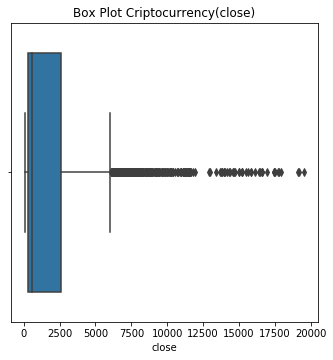

In [4]:
# Grafica dispersion - BoxPlot
plt.figure(figsize=(5.5,5.5))
g = sns.boxplot(BTC['close'])
g.set_title('Box Plot Criptocurrency(close)')
plt.show()
# La grafica nos permite ver los outliers ( Hay Muchos )

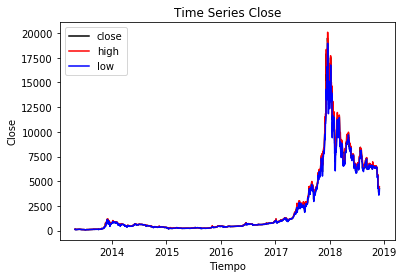

In [5]:
# Ahora vamos a graficar el plot de la serie de tiempo

plt.plot(BTC['date'],BTC['close'],'k',label='close')
plt.plot(BTC['date'],BTC['high'],'r',label='high')
plt.plot(BTC['date'],BTC['low'],'b',label='low')
plt.legend(loc='upper left')
plt.title('Time Series Close')
plt.xlabel('Tiempo')
plt.ylabel('Close')
plt.show()

In [6]:
# Vamos a escalar la serie de tiempo
scaler = MinMaxScaler(feature_range=(0,1))
BTC['Scaled_close'] = scaler.fit_transform(np.array(BTC['close']).reshape(-1,1))
BTC['Scaled_high'] = scaler.fit_transform(np.array(BTC['high']).reshape(-1,1))
BTC['Scaled_low'] = scaler.fit_transform(np.array(BTC['low']).reshape(-1,1))

print(BTC.head())

      slug symbol     name       date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin 2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin 2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin 2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin 2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin 2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  Scaled_close  \
0  134.21     0.0  1.488567e+09       0.5438    3.88      0.003386   
1  144.54     0.0  1.603769e+09       0.7813   13.49      0.003917   
2  139.00     0.0  1.542813e+09       0.3843   12.88      0.003632   
3  116.99     0.0  1.298955e+09       0.2882   32.17      0.002499   
4  105.21     0.0  1.168517e+09       0.3881   33.32      0.001893   

   Scaled_high  Scaled_low  
0     0.003069    0.003521  
1     0.003644    0.003621  
2     0.003616    0.003624  
3     0.003264    

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

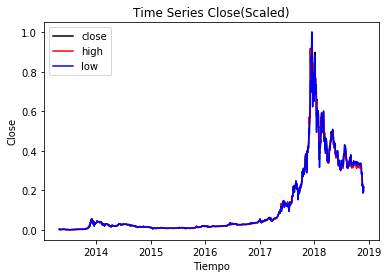

In [7]:
plt.plot(BTC['date'],BTC['Scaled_close'],'k',label='close')
plt.plot(BTC['date'],BTC['Scaled_high'],'r',label='high')
plt.plot(BTC['date'],BTC['Scaled_low'],'b',label='low')
plt.legend(loc='upper left')
plt.title('Time Series Close(Scaled)')
plt.xlabel('Tiempo')
plt.ylabel('Close')
plt.show()

In [8]:
# Ahora vamos a partir en train set y validation set
print("----------------------TRAIN Y VALIDATION---------------------")

split_date=dt.datetime(year=2018,month=1,day=1,hour=0)
BTC_train = BTC.loc[BTC['date']<split_date]
BTC_val = BTC.loc[BTC['date']>=split_date]
print('Shape of train:', BTC_train.shape) 
print('Shape of test:', BTC_val.shape) 


----------------------TRAIN Y VALIDATION---------------------
Shape of train: (1709, 16)
Shape of test: (333, 16)


In [9]:
print(BTC_train['Scaled_close'].head())
print("--------------------------------------------------------------------------")
print(BTC_val['Scaled_close'].head())

0    0.003386
1    0.003917
2    0.003632
3    0.002499
4    0.001893
Name: Scaled_close, dtype: float64
--------------------------------------------------------------------------
1709    0.699408
1710    0.767600
1711    0.778866
1712    0.799361
1713    0.893566
Name: Scaled_close, dtype: float64


In [10]:
def makeXy(ts, nb_timesteps,ind): 
    """ 
    Input:  
           ts: original time series 
           nb_timesteps: number of time steps in the regressors 
    Output:  
           X: 2-D array of regressors 
           y: 1-D array of target  
    """ 
    X = [] 
    y = [] 
    for i in range(nb_timesteps, ts.shape[0]):
        cosa = i+ind
        X.append(list(ts.loc[cosa-nb_timesteps:cosa-1])) 
        y.append(ts.loc[cosa]) 
    X, y = np.array(X), np.array(y) 
    return X, y 

In [11]:
BTC_val['Scaled_close'].loc[1709]

0.6994076371521496

In [12]:
X_train, y_train = makeXy(BTC_train['Scaled_close'], 7,0) 
print('Shape of train arrays:', X_train.shape, y_train.shape) 

Shape of train arrays: (1702, 7) (1702,)


In [13]:
# ERROR 
X_val, y_val = makeXy(BTC_val['Scaled_close'], 7,1709) 
#print('Shape of train arrays:', X_val.shape, y_val.shape)

In [14]:
from keras.layers import Dense, Input, Dropout 
from keras.optimizers import SGD 
from keras.models import Model 
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [15]:
input_layer = Input(shape=(7,), dtype='float32') 

dense1 = Dense(32, activation='linear')(input_layer) 
dense2 = Dense(16, activation='linear')(dense1) 
dense3 = Dense(16, activation='linear')(dense2)

dropout_layer = Dropout(0.2)(dense3) 

output_layer = Dense(1, activation='linear')(dropout_layer) 
ts_model = Model(inputs=input_layer, outputs=output_layer) 
ts_model.compile(loss='mean_squared_error', optimizer='adam') 
ts_model.summary()

save_weights_at = os.path.join('keras_models', 'Data')
#save_weights_at = "Data1"
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            period=1) 
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)      

In [39]:
from sklearn.metrics import r2_score 

best_model = load_model(os.path.join('keras_models', 'Data')) 
preds = best_model.predict(X_val)

print(X_val.shape)
print(y_val.shape)

(326, 7)
(326,)


R-squared for the validation set: 0.9472


Text(0.5,0,'Index')

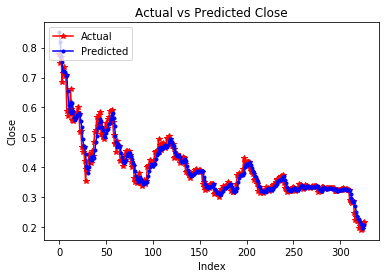

In [44]:
# MODELO PREDICCION

#pred_PRES = mu + sigma*preds 
#pred_PRES = np.squeeze(preds) 
 
r2 = r2_score(y_val, preds) 
print('R-squared for the validation set:', round(r2,4)) 


#plt.figure(figsize=(5.5, 5.5))
plt.plot(y_val, linestyle='-', marker='*', color='r') 
plt.plot(preds, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2) 
plt.title('Actual vs Predicted Close') 
plt.ylabel('Close') 
plt.xlabel('Index')